# 9 AutoGen - Multimodal

The AutoGen ecosystem provides everything you need to create AI agents, especially multi-agent workflows -- framework, developer tools, and applications.

The framework uses a layered and extensible design. Layers have clearly divided responsibilities and build on top of layers below. This design enables you to use the framework at different levels of abstraction, from high-level APIs to low-level components.

Core API implements message passing, event-driven agents, and local and distributed runtime for flexibility and power. It also support cross-language support for .NET and Python.
AgentChat API implements a simpler but opinionated API for rapid prototyping. This API is built on top of the Core API and is closest to what users of v0.2 are familiar with and supports common multi-agent patterns such as two-agent chat or group chats.
Extensions API enables first- and third-party extensions continuously expanding framework capabilities. It support specific implementation of LLM clients (e.g., OpenAI, AzureOpenAI), and capabilities such as code execution.

<img src="https://github.com/microsoft/autogen/raw/main/autogen-landing.jpg" width=400>

> https://microsoft.github.io/autogen/stable/<br>
> https://github.com/microsoft/autogen

In [1]:
import autogen
import datetime
import matplotlib.pyplot as plt
import openai
import os
import pandas as pd
import requests
import sys

from autogen import Agent, AssistantAgent, ConversableAgent
from autogen.agentchat.contrib.multimodal_conversable_agent import MultimodalConversableAgent
from autogen.code_utils import content_str
from io import BytesIO
from PIL import Image

In [2]:
sys.version

'3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]'

In [3]:
print(f"Today is {datetime.datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 20-May-2025 14:35:00


In [4]:
WORK_DIR = "workdir"

os.makedirs(WORK_DIR, exist_ok=True)

In [5]:
config_list_4v = autogen.config_list_from_json(
    "CONFIG_LIST",
    filter_dict={
        "model": ["gpt-4o"],
    },
)

In [6]:
config_list_gpt4 = autogen.config_list_from_json(
    "CONFIG_LIST",
    filter_dict={
        "model": [
            "gpt-4o-mini"
        ],
    },
)

## Example 1

In [7]:
url = "https://github.com/retkowsky/images/blob/master/autogen_car_1.jpg?raw=true"

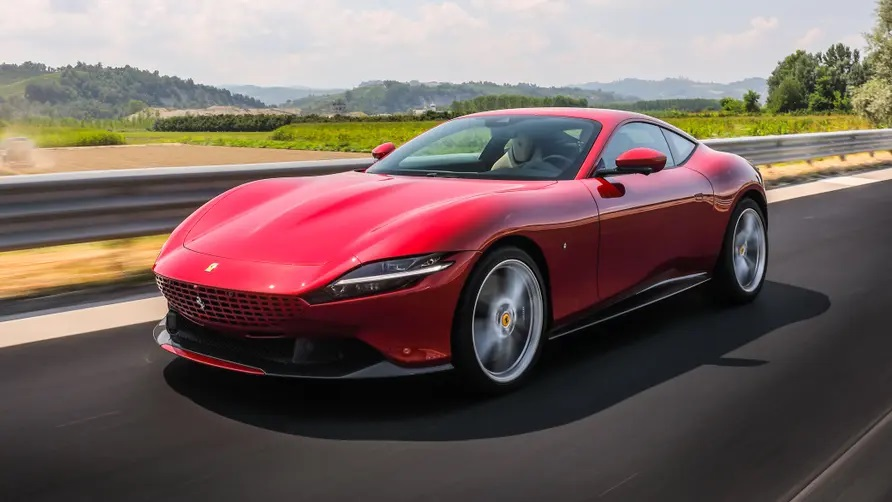

In [8]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [9]:
image_agent = MultimodalConversableAgent(
    name="image-explainer",
    max_consecutive_auto_reply=10,
    llm_config={
        "config_list": config_list_4v,
        "cache_seed": None,
        "temperature": 0.5,
        "max_tokens": 300
    },
)

user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    human_input_mode="NEVER",  # Try between ALWAYS or NEVER
    max_consecutive_auto_reply=0,
    code_execution_config={
        "use_docker": False
    },  # Please set use_docker=True if docker is available to run the generated code.
)

# Ask the question with an image
user_proxy.initiate_chat(
    image_agent,
    message="""What is this car?
<img https://github.com/retkowsky/images/blob/master/autogen_car_1.jpg?raw=true>.""",
)

User_proxy (to image-explainer):

What is this car?
<image>.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

This is the Ferrari Roma, a luxury grand touring coupe introduced by Ferrari in 2019. It features a sleek and minimalist design, inspired by Ferrari's classic models from the 1950s and 1960s, and is powered by a 3.9-liter twin-turbocharged V8 engine. The Roma is known for its balance of performance, elegance, and everyday usability.

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (e97ec4f4-9183-43f6-b16f-e1c85ece43fe): Maximum number of consecutive auto-replies reached


ChatResult(chat_id=None, chat_history=[{'content': 'What is this car?\n<img https://github.com/retkowsky/images/blob/master/autogen_car_1.jpg?raw=true>.', 'role': 'assistant', 'name': 'User_proxy'}, {'content': "This is the Ferrari Roma, a luxury grand touring coupe introduced by Ferrari in 2019. It features a sleek and minimalist design, inspired by Ferrari's classic models from the 1950s and 1960s, and is powered by a 3.9-liter twin-turbocharged V8 engine. The Roma is known for its balance of performance, elegance, and everyday usability.", 'role': 'user', 'name': 'image-explainer'}], summary="This is the Ferrari Roma, a luxury grand touring coupe introduced by Ferrari in 2019. It features a sleek and minimalist design, inspired by Ferrari's classic models from the 1950s and 1960s, and is powered by a 3.9-liter twin-turbocharged V8 engine. The Roma is known for its balance of performance, elegance, and everyday usability.", cost={'usage_including_cached_inference': {'total_cost': 0.0

## Example 2

In [10]:
url="https://github.com/retkowsky/images/blob/master/autogen_car_2.jpg?raw=true"

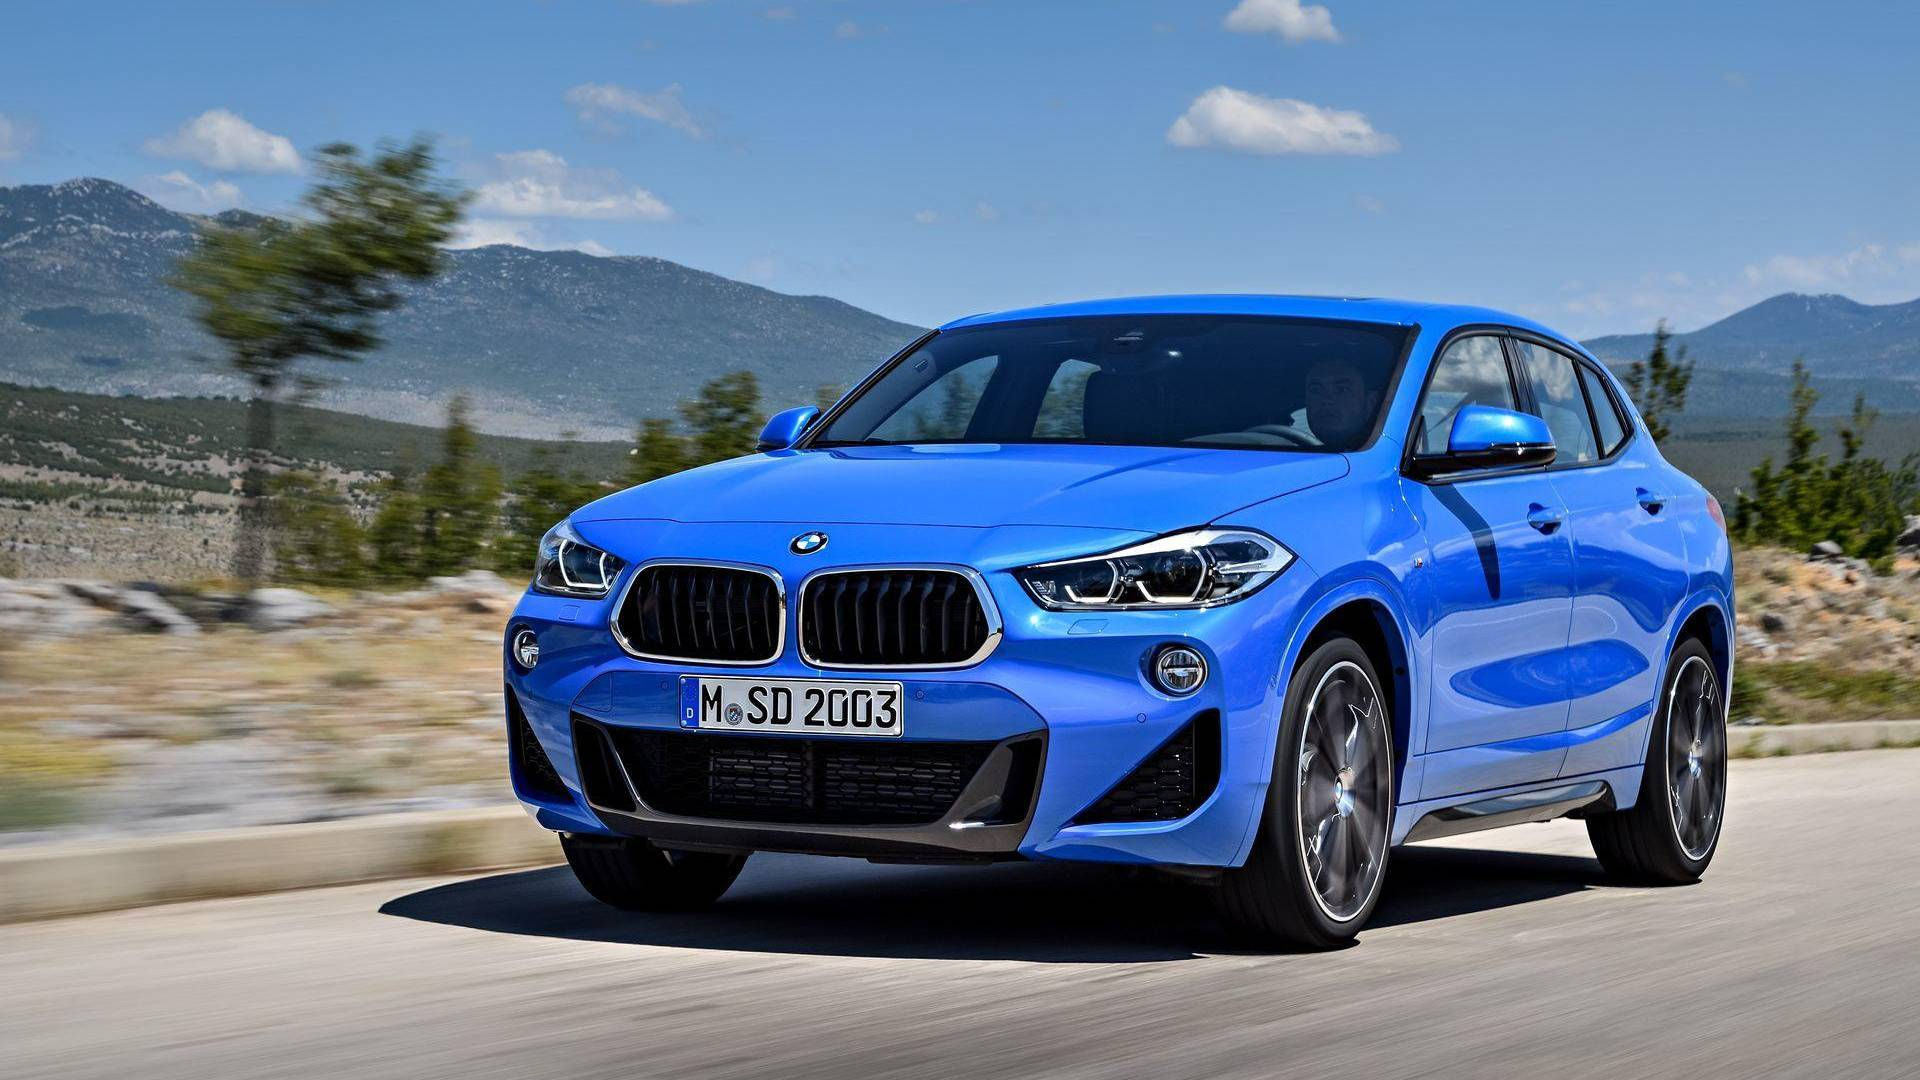

In [11]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [12]:
# Ask the question with an image
user_proxy.send(
    message="""What is this car?
<img https://github.com/retkowsky/images/blob/master/autogen_car_2.jpg?raw=trueg>

Make a summary of these cars""",
    recipient=image_agent,
)

User_proxy (to image-explainer):

What is this car?
<image>

Make a summary of these cars

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

This is the BMW X2, a compact luxury crossover SUV designed with a sportier and more dynamic aesthetic compared to its sibling, the BMW X1. It features a coupe-like roofline, bold styling, and a performance-oriented driving experience. 

### Summary of the Cars:
1. **Ferrari Roma**: A luxurious grand touring coupe with a sleek, minimalist design, inspired by Ferrari's classic models. It is powered by a twin-turbocharged V8 engine, offering a blend of elegance, performance, and practicality.

2. **BMW X2**: A compact luxury crossover with a sporty and dynamic design. It combines the practicality of an SUV with the styling and agility of a coupe, catering to those seeking a versatile yet stylish vehicle.

---------------------------------------------------

## Example 3

In [13]:
url ="https://github.com/retkowsky/images/blob/master/autogen_image_1.jpg?raw=true"

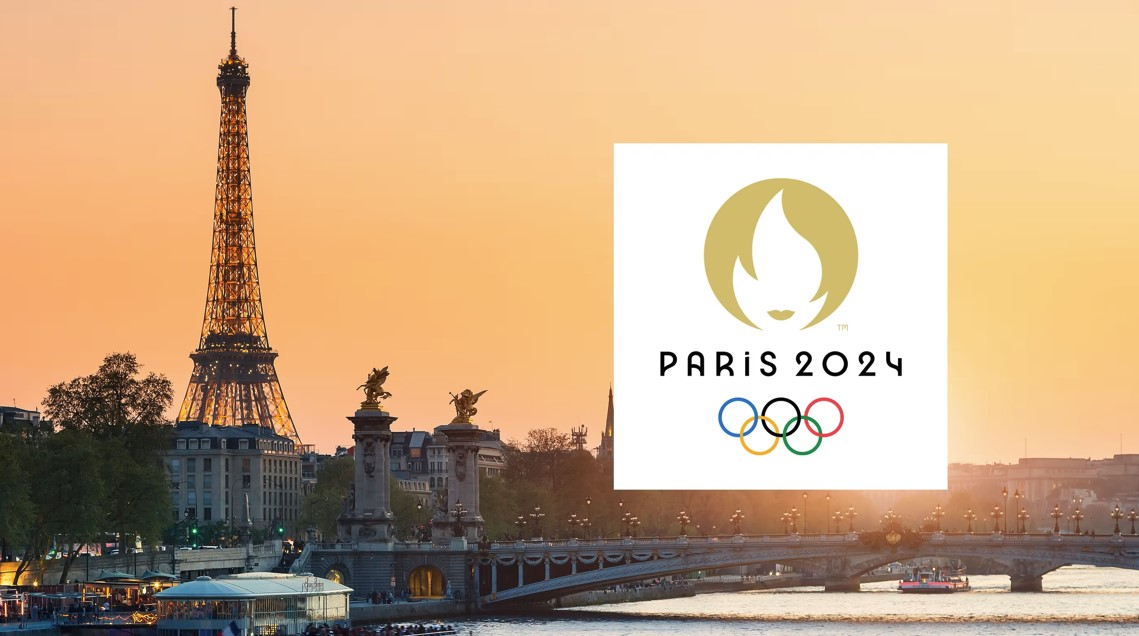

In [14]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [15]:
# Ask the question with an image
user_proxy.send(
    message="""Can you describe this image using hashtags and emojis?
<img https://github.com/retkowsky/images/blob/master/autogen_image_1.jpg?raw=true>

Make a summary""",
    recipient=image_agent,
)

User_proxy (to image-explainer):

Can you describe this image using hashtags and emojis?
<image>

Make a summary

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

### Hashtags and Emojis:
#Paris2024 🗼🇫🇷 #Olympics 🏅🌍 #EiffelTower 🌅 #CityOfLight ✨ #GlobalUnity 🤝 #SportsForAll 🏃‍♂️🏊‍♀️🚴‍♀️

### Summary:
This image showcases the Eiffel Tower at sunset alongside the official logo for the Paris 2024 Olympics, highlighting the city's role as the host of this global sporting event. It symbolizes unity, athletic excellence, and the vibrant culture of Paris.

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (6d343e48-87c7-4b9d-9b65-019a68dacfd0): Maximum number of consecutive auto-replies reached


## Example 4

In [16]:
class FigureCreator(ConversableAgent):
    def __init__(self, n_iters=2, **kwargs):
        """
        Initializes a FigureCreator instance.

        This agent facilitates the creation of visualizations through a collaborative effort among its child agents: 
        commander, coder, and critics.

        Parameters:
            - n_iters (int, optional): The number of "improvement" iterations to run. Defaults to 2.
            - **kwargs: keyword arguments for the parent AssistantAgent.
        """
        super().__init__(**kwargs)
        self.register_reply([Agent, None],
                            reply_func=FigureCreator._reply_user,
                            position=0)
        self._n_iters = n_iters

    def _reply_user(self, messages=None, sender=None, config=None):
        if all((messages is None, sender is None)):
            error_msg = f"Either {messages=} or {sender=} must be provided."
            logger.error(error_msg)
            raise AssertionError(error_msg)
        if messages is None:
            messages = self._oai_messages[sender]

        user_question = messages[-1]["content"]

        # Define the agents
        commander = AssistantAgent(
            name="Commander",
            human_input_mode="NEVER",
            max_consecutive_auto_reply=10,
            system_message="Help me run the code, and tell other agents it is in the <img result.jpg> file location.",
            is_termination_msg=lambda x: x.get("content", "").rstrip(
            ).endswith("TERMINATE"),
            code_execution_config={
                "last_n_messages": 3,
                "work_dir": WORK_DIR,
                "use_docker": False,
            },
            llm_config=self.llm_config,
        )

        critics = MultimodalConversableAgent(
            name="Critics",
            system_message="""Criticize the input figure. How to replot the figure so it will be better?
            Find bugs and issues for the figure.
            Pay attention to the color, format, and presentation. Keep in mind of the reader-friendliness.
            If you think the figures is good enough, then simply say NO_ISSUES""",
            llm_config={
                "config_list": config_list_4v,
                "max_tokens": 300,
                "cache_seed": None
            },
            human_input_mode="NEVER",
            max_consecutive_auto_reply=1,
            # use_docker=False,
        )

        coder = AssistantAgent(
            name="Coder",
            llm_config=self.llm_config,
        )

        coder.update_system_message(
            coder.system_message +
            "ALWAYS save the figure in 'plot.jpg' file. Tell other agents it is in the <img plot.jpg> file location."
        )

        # Data flow begins
        commander.initiate_chat(coder, message=user_question)
        img = Image.open(os.path.join(WORK_DIR, "plot.jpg"))
        plt.imshow(img)
        plt.axis("off")  # Hide the axes
        plt.show()

        for i in range(self._n_iters):
            commander.send(
                message=f"Improve <img {os.path.join(WORK_DIR, 'plot.jpg')}>",
                recipient=critics,
                request_reply=True,
            )

            feedback = commander._oai_messages[critics][-1]["content"]
            if feedback.find("NO_ISSUES") >= 0:
                break
            commander.send(
                message="Here is the feedback to your figure. Please improve! Save the result to 'final_plot.jpg'\n"
                + feedback,
                recipient=coder,
                request_reply=True,
            )
            img = Image.open(os.path.join(WORK_DIR, "final_plot.jpg"))
            plt.imshow(img)
            plt.axis("off")
            plt.show()

        return True, os.path.join(WORK_DIR, "final_plot.jpg")

In [17]:
gpt4_llm_config = {"config_list": config_list_gpt4, "cache_seed": None}

In [18]:
csv_url = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"

df = pd.read_csv(csv_url)
df

date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

In [19]:
df.shape

(1461, 6)

In [20]:
df.describe()

precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

User (to Figure Creator~):


Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low in a chart. The high temperature should be orange, 
the low temperature should be blue. All the labels should be visible. 


--------------------------------------------------------------------------------
Commander (to Coder):


Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low in a chart. The high temperature should be orange, 
the low temperature should be blue. All the labels should be visible. 


--------------------------------------------------------------------------------
Coder (to Commander):

To complete your request, I will follow these steps:

1. I will download the CSV data from the provided URL.
2. I will read the data and extract the high and low temperature values.
3. I

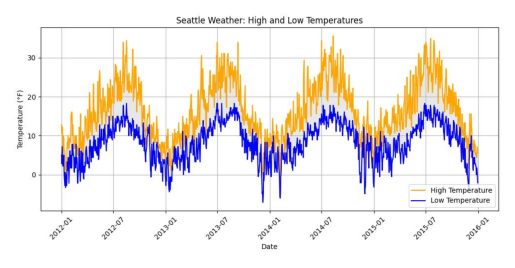

Commander (to Critics):

Improve <image>

--------------------------------------------------------------------------------
Critics (to Commander):

Here are some critiques and suggestions to improve the figure:

### Issues:
1. **Color Contrast**:
   - While the colors for high (orange) and low (blue) temperatures are distinguishable, people with color blindness might face difficulties distinguishing them. Consider using a colorblind-friendly palette.

2. **Gridlines**:
   - The presence of gridlines may improve readability for some data points, but they can dominate the image and make it feel cluttered. A lighter shade of gridlines could be more appropriate.

3. **Legend Placement**:
   - The legend is placed to the side of the graph, which may take up extra space and create unnecessary white space. It can be moved inside the plot area to maximize space usage.

4. **Title Formatting**:
   - The title is quite plain. Adding more descriptive details (e.g., the range of years in the title

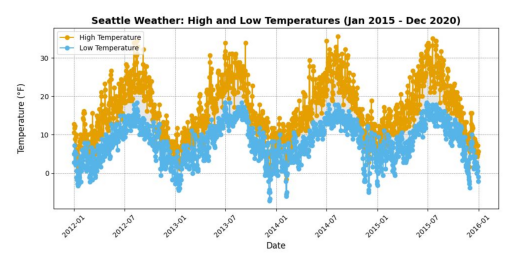

Commander (to Critics):

Improve <image>

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (8baa0876-5cc2-40b4-9140-f2cef63b1bb0): Maximum number of consecutive auto-replies reached
Commander (to Coder):

Here is the feedback to your figure. Please improve! Save the result to 'final_plot.jpg'
Improve <img workdir/plot.jpg>

--------------------------------------------------------------------------------
Coder (to Commander):

To enhance the figure based on your latest feedback, I will make the following improvements:

1. **Line Styles**: I will switch to dashed lines for better differentiation between the high and low temperature lines, along with markers.
2. **Background**: Adding a light gray background can help the lines stand out more.
3. **Better Label Formatting**: I will ensure that the x and y axis labels are bold for better visibility.
4. **Adjusting the Fill Between Area**: I'll use a more transparent fill for the area

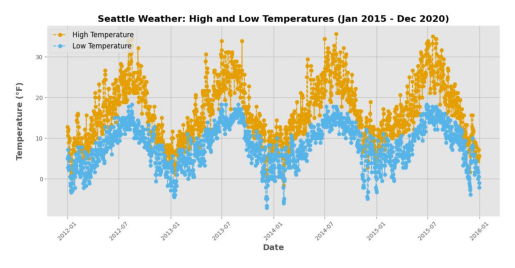

Figure Creator~ (to User):

workdir/final_plot.jpg

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (39913214-70bf-42ee-9f71-65afb61be0a3): Maximum number of consecutive auto-replies reached


ChatResult(chat_id=None, chat_history=[{'content': '\nPlot a figure by using the data from:\nhttps://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv\n\nI want to show both temperature high and low in a chart. The high temperature should be orange, \nthe low temperature should be blue. All the labels should be visible. \n', 'role': 'assistant', 'name': 'User'}, {'content': 'workdir/final_plot.jpg', 'role': 'user', 'name': 'Figure Creator~'}], summary='workdir/final_plot.jpg', cost={'usage_including_cached_inference': {'total_cost': 0}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=[])

In [21]:
creator = FigureCreator(name="Figure Creator~", llm_config=gpt4_llm_config)

user_proxy = autogen.UserProxyAgent(
    name="User",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=0,
    code_execution_config={"use_docker": False})

user_proxy.initiate_chat(
    creator,
    message="""
Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low in a chart. The high temperature should be orange, 
the low temperature should be blue. All the labels should be visible. 
""",
)

### First plot

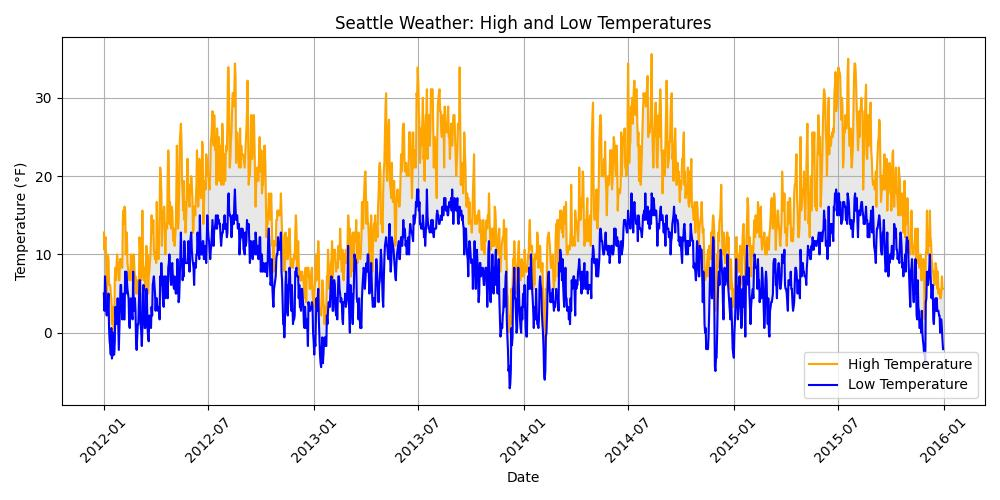

In [22]:
img = Image.open(os.path.join(WORK_DIR, 'plot.jpg'))
img

### Enhanced plot

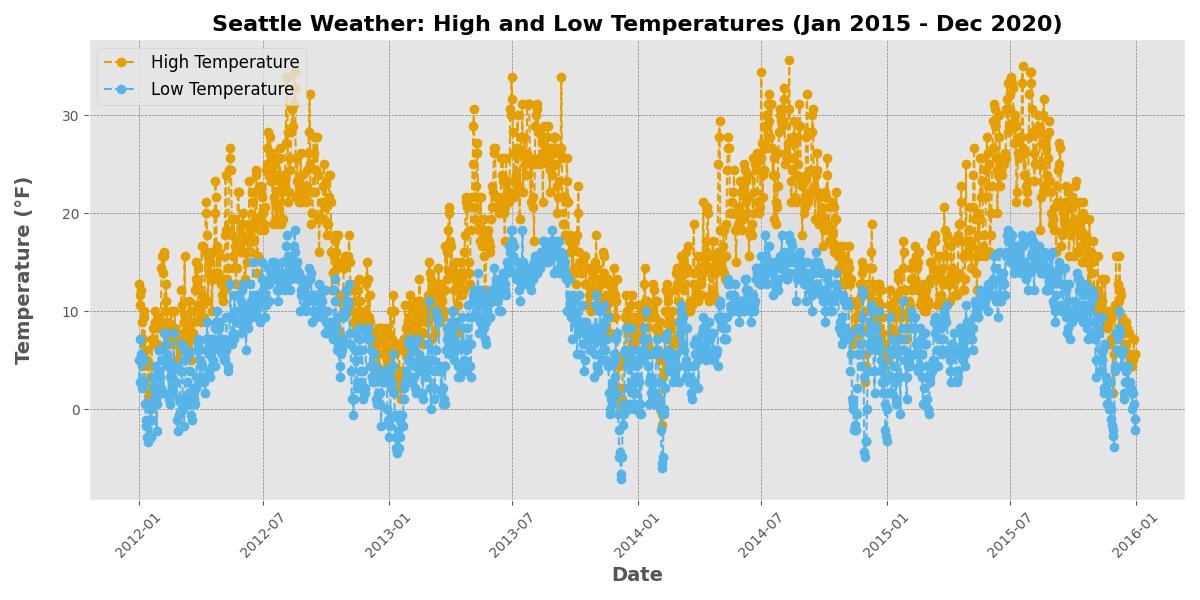

In [23]:
img = Image.open(os.path.join(WORK_DIR, 'final_plot.jpg'))
img

### Both images

In [24]:
def side_by_side_images(imagefile1, imagefile2):
    """
    Side by side images
    """
    # Display images side by side
    image1 = plt.imread(imagefile1)
    image2 = plt.imread(imagefile2)
    # Settings
    f, ax = plt.subplots(1, 2, figsize=(15, 8))
    ax[0].imshow(image1)
    ax[1].imshow(image2)
    ax[0].set_title('1. Initial plot')
    ax[1].set_title('2. Enhanced plot')
    plt.tight_layout()
    plt.show()

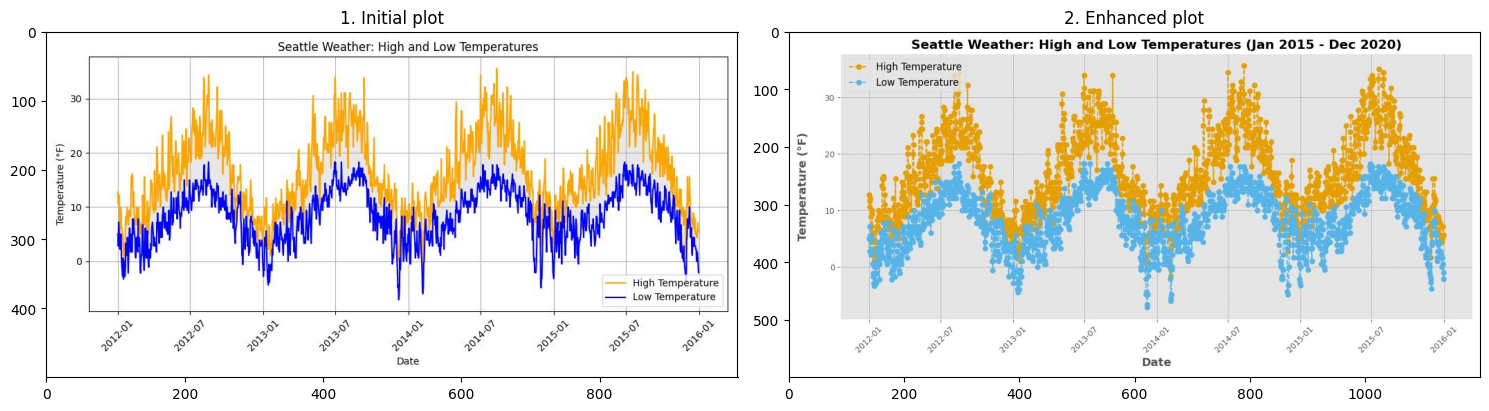

In [25]:
side_by_side_images(
    os.path.join(WORK_DIR, 'plot.jpg'),
    os.path.join(WORK_DIR, 'final_plot.jpg')
)

In [26]:
!ls $WORK_DIR/*.jpg -lh

-rwxrwxrwx 1 root root 93K May 20 14:36 workdir/final_plot.jpg
-rwxrwxrwx 1 root root 76K May 20 14:35 workdir/plot.jpg
